In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df_train = pd.read_excel("D:/Internship/flight_fare/flight-fare-prediction/data/Data_Train.xlsx")
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [196]:
df_test = pd.read_excel("D:/Internship/flight_fare/flight-fare-prediction/data/Test_set.xlsx")
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [197]:
df_train["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [198]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [199]:
def summary_col(df, col):
    print(df[str(col)].value_counts())
    sns.set_style("whitegrid")
    plt.figure(figsize=(15,8))
    ax = sns.countplot(y=col, data=df)

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


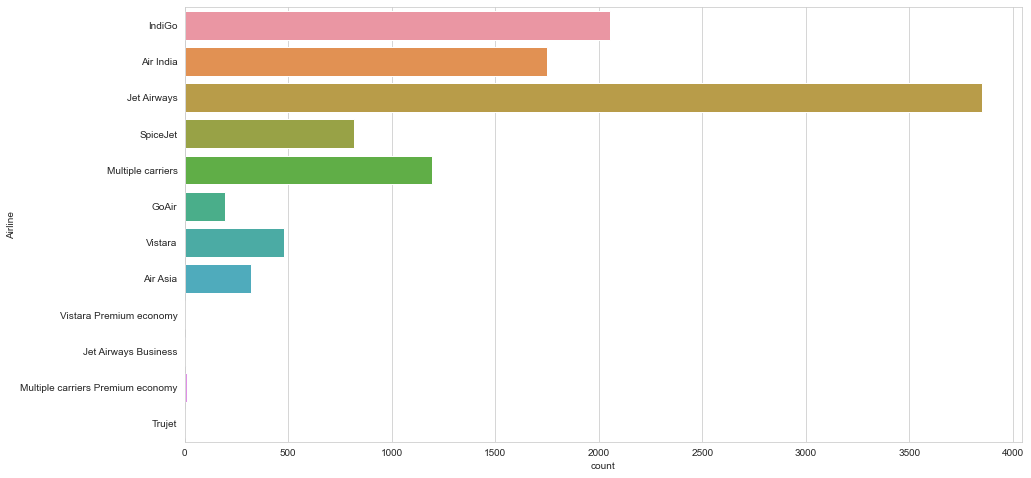

In [200]:
summary_col(df_train, "Airline")

In [201]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [202]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [203]:
df_train["Date_of_Journey"] = pd.to_datetime(df_train["Date_of_Journey"])
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [204]:
df_train.Date_of_Journey.min(), df_train.Date_of_Journey.max()

(Timestamp('2019-01-03 00:00:00'), Timestamp('2019-12-06 00:00:00'))

In [205]:
def year_month_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day

    return year_month_extract

In [206]:
year_month_extract(df_train, "Date_of_Journey")

<function __main__.year_month_extract(df, col)>

In [207]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3


In [208]:
df_train.isna().sum()/(len(df_train))*100

Airline                  0.000000
Date_of_Journey          0.000000
Source                   0.000000
Destination              0.000000
Route                    0.009361
Dep_Time                 0.000000
Arrival_Time             0.000000
Duration                 0.000000
Total_Stops              0.009361
Additional_Info          0.000000
Price                    0.000000
Date_of_Journey_year     0.000000
Date_of_Journey_month    0.000000
Date_of_Journey_day      0.000000
dtype: float64

In [209]:
df_train = df_train.dropna()
df_train = df_train.reset_index(drop = True)
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,3,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,2019,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,2019,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,2019,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,2019,9,4
10678,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,2019,4,27
10679,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,2019,4,27
10680,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,2019,1,3


In [210]:
df_train["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [211]:
df_train.drop(["Date_of_Journey", "Route", "Additional_Info"], axis = 1, inplace=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

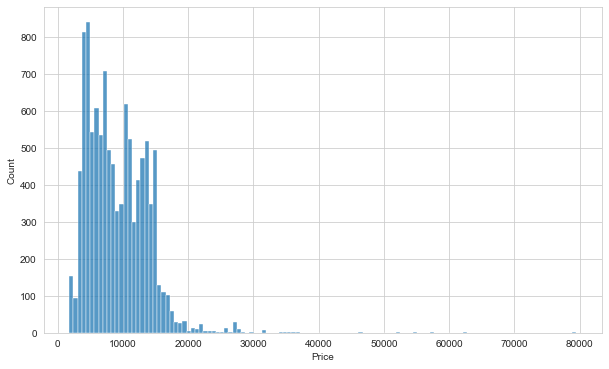

In [212]:
plt.figure(figsize=(10, 6))
sns.histplot(x = df_train["Price"])

In [213]:
def expensive(df):
    df = df[df["Price"] > 20000]
    return df 

In [214]:
expensive(df_train)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
7,Jet Airways,Banglore,New Delhi,08:00,05:05 02 Mar,21h 5m,1 stop,22270,2019,1,3
123,Air India,Delhi,Cochin,23:00,19:15 02 Mar,20h 15m,1 stop,27430,2019,1,3
396,Multiple carriers,Delhi,Cochin,12:50,19:15,6h 25m,1 stop,36983,2019,1,3
486,Jet Airways,Banglore,New Delhi,08:55,15:15,6h 20m,1 stop,26890,2019,1,3
510,Jet Airways,Banglore,New Delhi,07:00,12:25,5h 25m,1 stop,26890,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10438,Jet Airways,Banglore,New Delhi,18:40,09:00 02 Mar,14h 20m,1 stop,31825,2019,1,3
10455,Jet Airways,Delhi,Cochin,19:10,18:50 08 Mar,47h 40m,2 stops,20694,2019,6,3
10510,Air India,Banglore,New Delhi,06:45,09:25 02 Mar,26h 40m,2 stops,26480,2019,1,3
10560,Jet Airways,Banglore,New Delhi,14:05,09:00 02 Mar,18h 55m,1 stop,20800,2019,1,3


In [215]:
df_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,2019,1,3


In [216]:
def duration_minutes(df): 
    df["Duration"] = df["Duration"].str.replace("h", "*60").str.replace(' ','+').str.replace("m","*1").apply(eval)

    return df 

In [217]:
duration_minutes(df_train)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,445,2 stops,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1 stop,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1 stop,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,19:55,22:25,150,non-stop,4107,2019,9,4
10678,Air India,Kolkata,Banglore,20:45,23:20,155,non-stop,4145,2019,4,27
10679,Jet Airways,Banglore,Delhi,08:20,11:20,180,non-stop,7229,2019,4,27
10680,Vistara,Banglore,New Delhi,11:30,14:10,160,non-stop,12648,2019,1,3


In [218]:
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,445,2 stops,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1 stop,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1 stop,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,19:55,22:25,150,non-stop,4107,2019,9,4
10678,Air India,Kolkata,Banglore,20:45,23:20,155,non-stop,4145,2019,4,27
10679,Jet Airways,Banglore,Delhi,08:20,11:20,180,non-stop,7229,2019,4,27
10680,Vistara,Banglore,New Delhi,11:30,14:10,160,non-stop,12648,2019,1,3


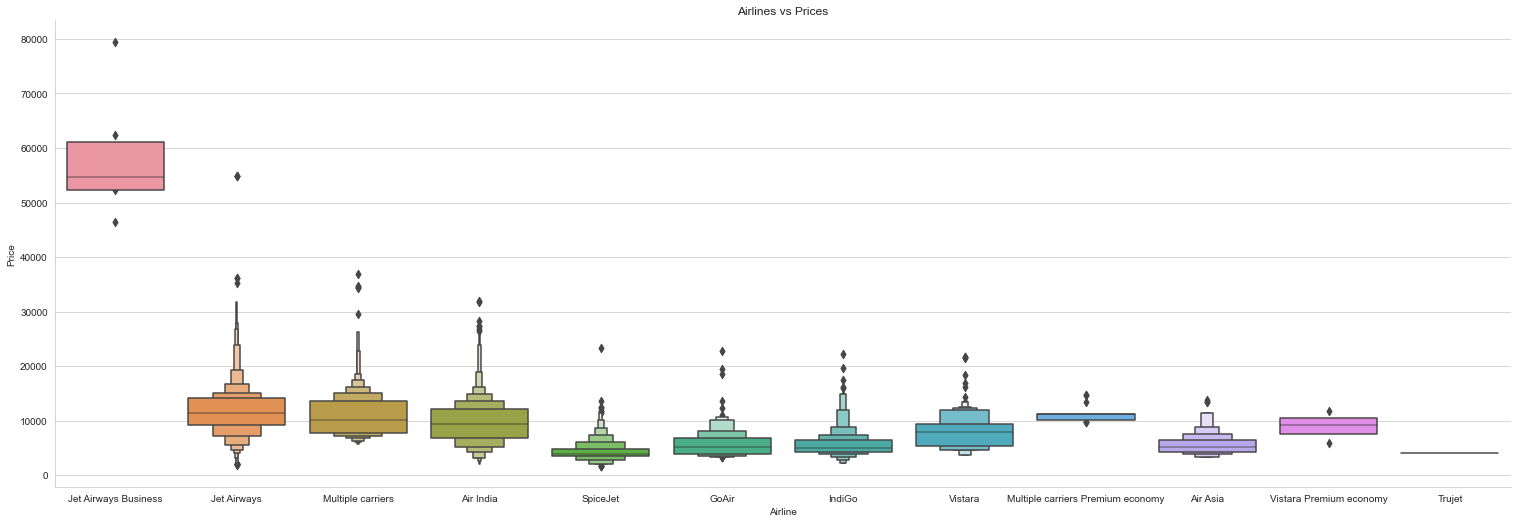

In [219]:
sns.catplot(y = "Price", x = "Airline", data = df_train.sort_values("Price", ascending = False), kind="boxen", height = 7, aspect = 3).set(title = "Airlines vs Prices")
plt.show()

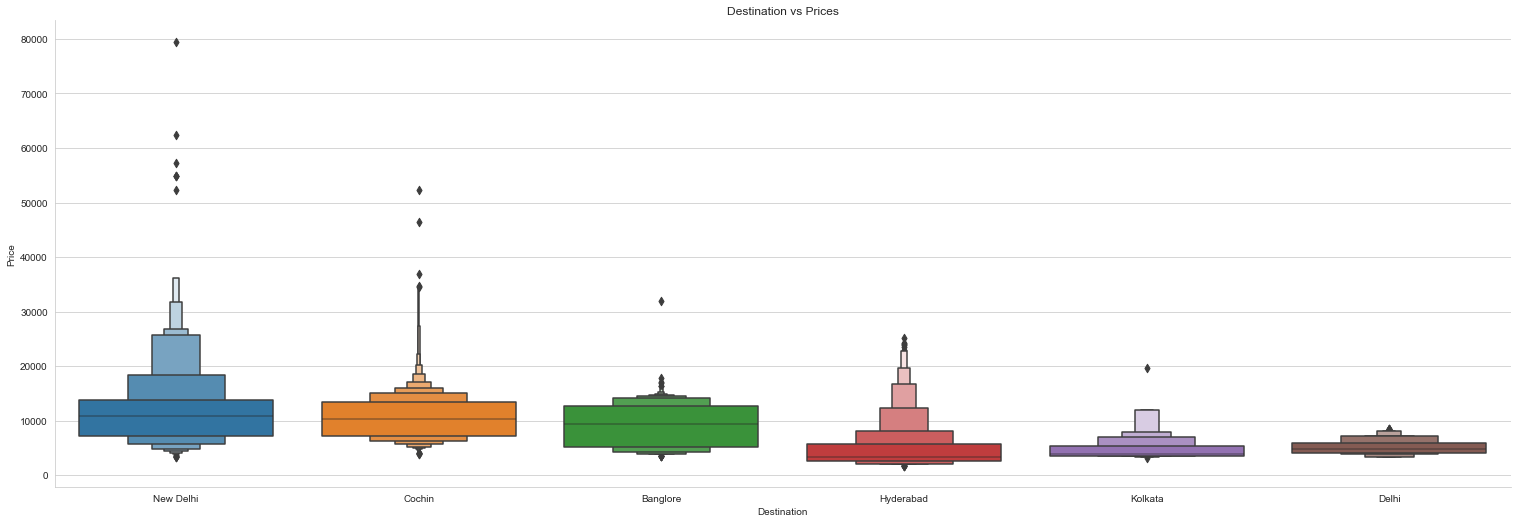

In [220]:
sns.catplot(y = "Price", x = "Destination", data = df_train.sort_values("Price", ascending = False), 
kind="boxen", height = 7, aspect = 3).set(title = "Destination vs Prices")
plt.show()

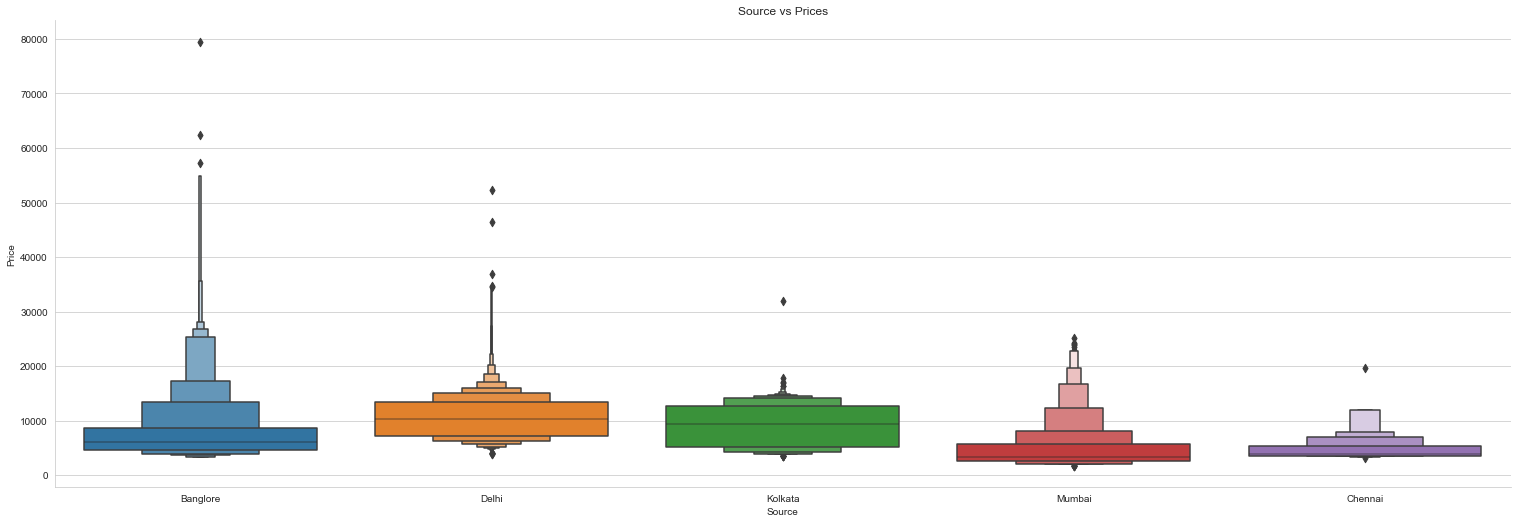

In [244]:
sns.catplot(y = "Price", x = "Source", data = df_train.sort_values("Price", ascending = False), 
kind="boxen", height = 7, aspect = 3).set(title = "Source vs Prices")
plt.show()

In [221]:
df_train["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

<AxesSubplot:xlabel='Duration', ylabel='Price'>

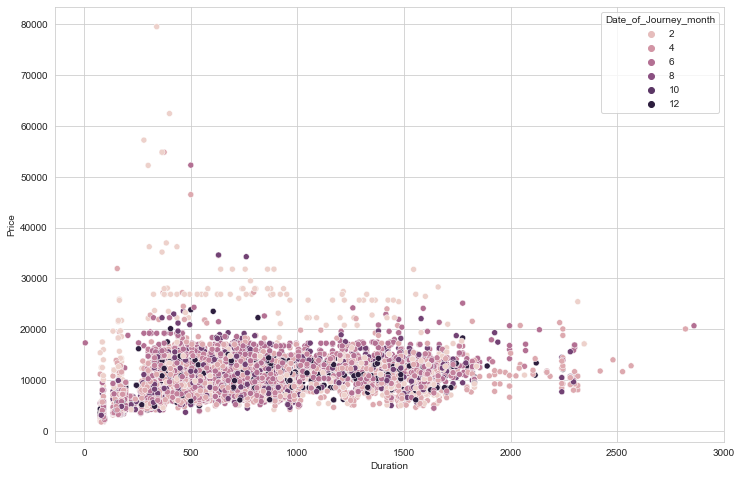

In [222]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_train["Duration"], y = df_train["Price"], hue = df_train["Date_of_Journey_month"])

In [223]:
df_train.corr()

,Duration,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
Duration,1.000000,0.506480,NaN,0.055136,-0.038360
Price,0.506480,1.000000,NaN,0.010705,-0.165448
Date_of_Journey_year,NaN,NaN,NaN,NaN,NaN
Date_of_Journey_month,0.055136,0.010705,NaN,1.000000,-0.264896
Date_of_Journey_day,-0.038360,-0.165448,NaN,-0.264896,1.000000


In [224]:
df_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,170,non-stop,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,445,2 stops,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,1140,2 stops,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,325,1 stop,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,285,1 stop,13302,2019,1,3


In [225]:
df_train["Dep_Time"] = pd.to_datetime(df_train["Dep_Time"])
df_train["Arrival_Time"] = pd.to_datetime(df_train["Arrival_Time"])
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,2022-05-14 22:20:00,2022-03-22 01:10:00,170,non-stop,3897,2019,3,24
1,Air India,Kolkata,Banglore,2022-05-14 05:50:00,2022-05-14 13:15:00,445,2 stops,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,2022-05-14 09:25:00,2022-06-10 04:25:00,1140,2 stops,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,2022-05-14 18:05:00,2022-05-14 23:30:00,325,1 stop,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,2022-05-14 16:50:00,2022-05-14 21:35:00,285,1 stop,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,2022-05-14 19:55:00,2022-05-14 22:25:00,150,non-stop,4107,2019,9,4
10678,Air India,Kolkata,Banglore,2022-05-14 20:45:00,2022-05-14 23:20:00,155,non-stop,4145,2019,4,27
10679,Jet Airways,Banglore,Delhi,2022-05-14 08:20:00,2022-05-14 11:20:00,180,non-stop,7229,2019,4,27
10680,Vistara,Banglore,New Delhi,2022-05-14 11:30:00,2022-05-14 14:10:00,160,non-stop,12648,2019,1,3


In [226]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day
0,IndiGo,Banglore,New Delhi,2022-05-14 22:20:00,2022-03-22 01:10:00,170,0,3897,2019,3,24
1,Air India,Kolkata,Banglore,2022-05-14 05:50:00,2022-05-14 13:15:00,445,2,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,2022-05-14 09:25:00,2022-06-10 04:25:00,1140,2,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,2022-05-14 18:05:00,2022-05-14 23:30:00,325,1,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,2022-05-14 16:50:00,2022-05-14 21:35:00,285,1,13302,2019,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,2022-05-14 19:55:00,2022-05-14 22:25:00,150,0,4107,2019,9,4
10678,Air India,Kolkata,Banglore,2022-05-14 20:45:00,2022-05-14 23:20:00,155,0,4145,2019,4,27
10679,Jet Airways,Banglore,Delhi,2022-05-14 08:20:00,2022-05-14 11:20:00,180,0,7229,2019,4,27
10680,Vistara,Banglore,New Delhi,2022-05-14 11:30:00,2022-05-14 14:10:00,160,0,12648,2019,1,3


In [227]:
def dep_arrival_extract(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return dep_arrival_extract

In [228]:
dep_arrival_extract(df_train, "Dep_Time")
dep_arrival_extract(df_train, "Arrival_Time")

<function __main__.dep_arrival_extract(df, col)>

In [229]:
df_train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,2022-05-14 22:20:00,2022-03-22 01:10:00,170,0,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2022-05-14 05:50:00,2022-05-14 13:15:00,445,2,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2022-05-14 09:25:00,2022-06-10 04:25:00,1140,2,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,2022-05-14 18:05:00,2022-05-14 23:30:00,325,1,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,2022-05-14 16:50:00,2022-05-14 21:35:00,285,1,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,2022-05-14 19:55:00,2022-05-14 22:25:00,150,0,4107,2019,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,2022-05-14 20:45:00,2022-05-14 23:20:00,155,0,4145,2019,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,2022-05-14 08:20:00,2022-05-14 11:20:00,180,0,7229,2019,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,2022-05-14 11:30:00,2022-05-14 14:10:00,160,0,12648,2019,1,3,11,30,14,10


In [230]:
df_train.drop(["Dep_Time", "Arrival_Time"], axis = 1, inplace = True)

In [231]:
df_train

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,170,0,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1,13302,2019,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,150,0,4107,2019,9,4,19,55,22,25
10678,Air India,Kolkata,Banglore,155,0,4145,2019,4,27,20,45,23,20
10679,Jet Airways,Banglore,Delhi,180,0,7229,2019,4,27,8,20,11,20
10680,Vistara,Banglore,New Delhi,160,0,12648,2019,1,3,11,30,14,10


In [232]:
dummy_year = pd.get_dummies(df_train["Airline"], prefix="Airline", drop_first= True)
dummy_month = pd.get_dummies(df_train["Source"], prefix="Source", drop_first= True)
dummy_crime_type = pd.get_dummies(df_train["Destination"], prefix="Destination", drop_first= True)

In [233]:
df = pd.concat([df_train, dummy_year, dummy_month, dummy_crime_type], axis=1)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Date_of_Journey_year,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,170,0,3897,2019,3,24,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,2,7662,2019,1,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1140,2,13882,2019,9,6,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,325,1,6218,2019,12,5,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,285,1,13302,2019,1,3,16,...,0,0,0,0,0,0,0,0,0,1


In [234]:
df.drop(["Airline", "Source", "Destination", "Date_of_Journey_year"], axis = 1, inplace = True)

In [235]:
df

,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,3,24,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,150,0,4107,9,4,19,55,22,25,0,...,0,0,0,1,0,0,0,0,0,0
10678,155,0,4145,4,27,20,45,23,20,1,...,0,0,0,1,0,0,0,0,0,0
10679,180,0,7229,4,27,8,20,11,20,0,...,0,0,0,0,0,0,1,0,0,0
10680,160,0,12648,1,3,11,30,14,10,0,...,0,0,0,0,0,0,0,0,0,1


In [236]:
len(df["Date_of_Journey_day"].unique())

9

In [237]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Date_of_Journey_month',
       'Date_of_Journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [238]:
df.shape

(10682, 29)

In [239]:
mean_encoded = df.groupby(['Date_of_Journey_day'])['Price'].mean().to_dict()
mean_encoded

{3: 13294.19103600294,
 4: 6120.395419847328,
 5: 8779.787922358017,
 6: 9305.85595567867,
 15: 8127.8109756097565,
 18: 8671.573317307691,
 21: 8351.760576057606,
 24: 8399.446768060836,
 27: 8204.128318584071}

<AxesSubplot:>

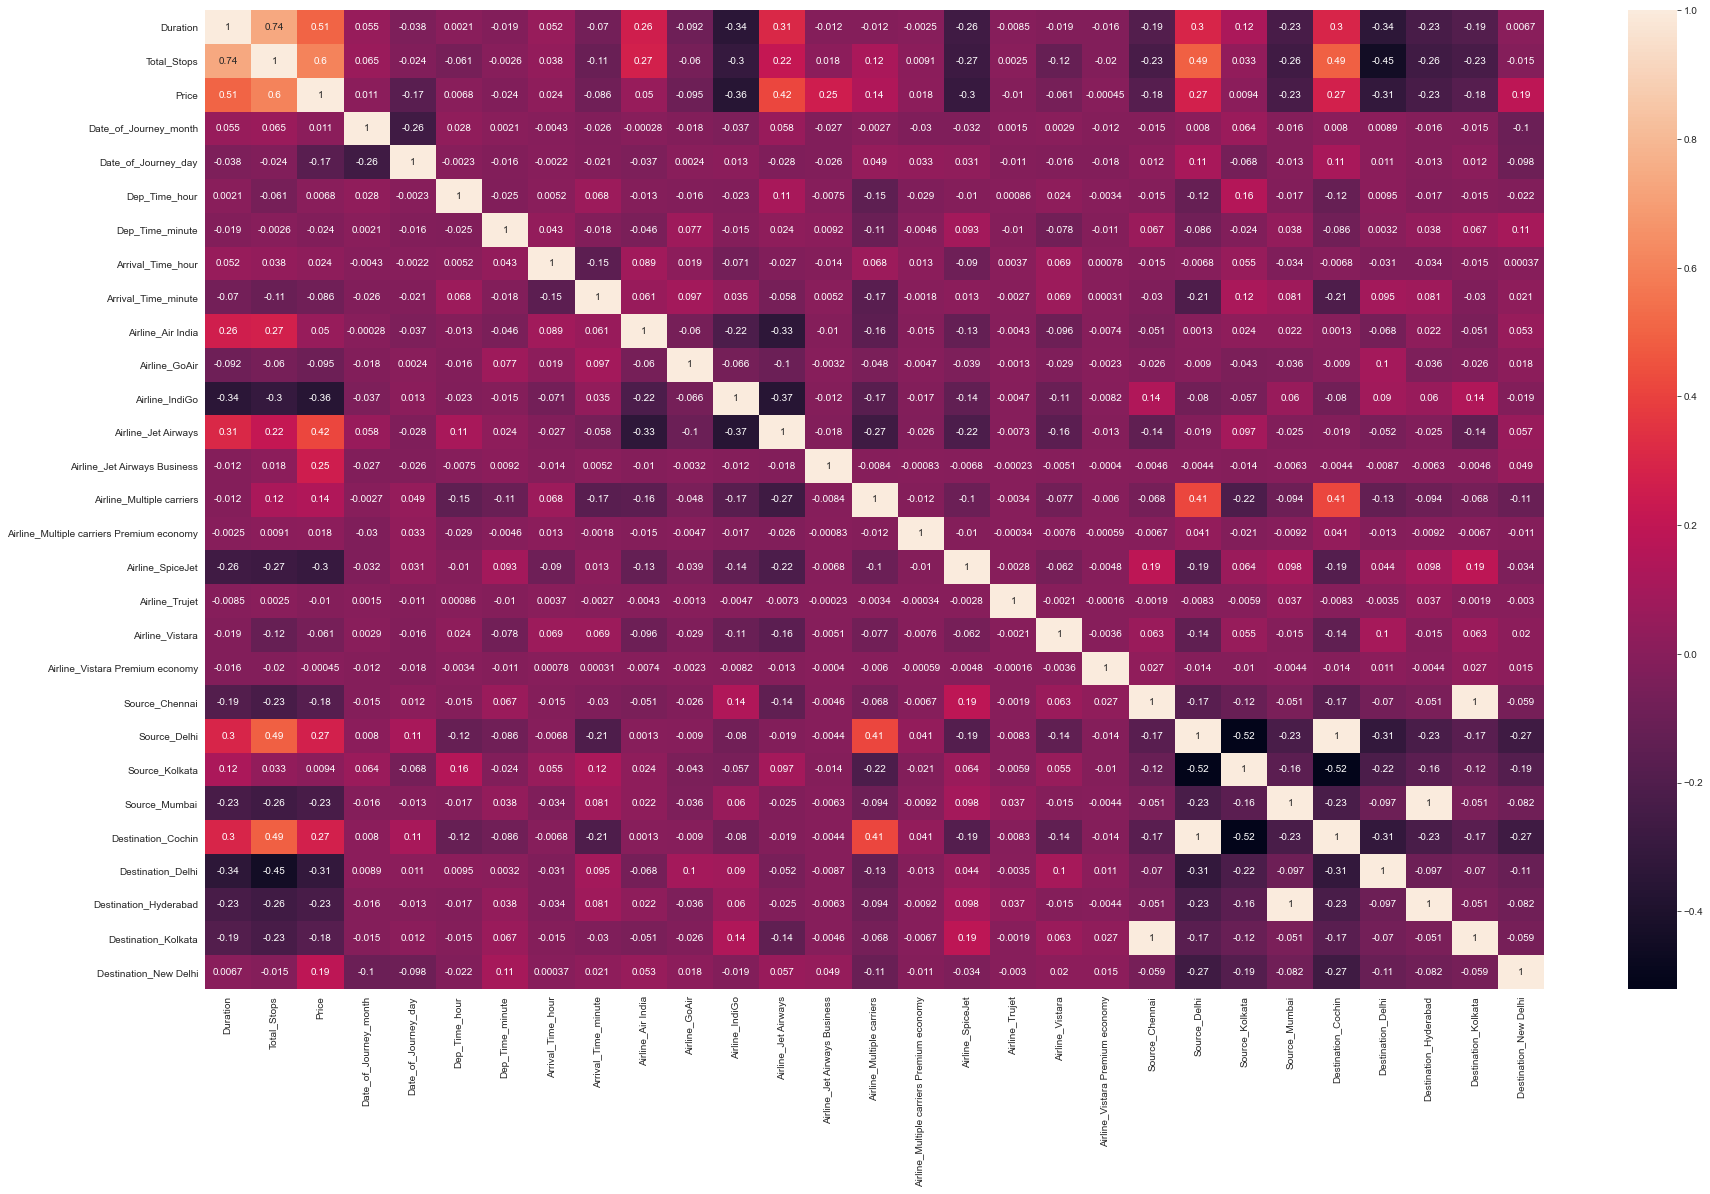

In [251]:
plt.figure(figsize = (30, 18))
sns.heatmap(df.corr(), annot = True)

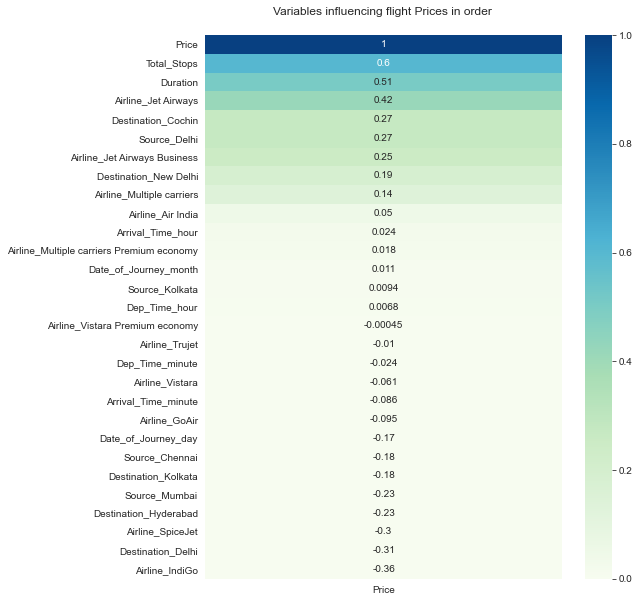

In [256]:
plt.rcParams['figure.figsize'] = [8, 10]

_ = sns.heatmap(df.corr()[['Price']]
                .sort_values(by='Price', ascending=False),
                vmin=0,
                vmax=1,
                annot=True,
                cmap='GnBu');

_.set_title('Variables influencing flight Prices in order ',
            fontdict={'fontsize':12},
            pad=20);

plt.show()

In [257]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Date_of_Journey_month',
       'Date_of_Journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [ ]:
def year_month_extract(df, col):
    df[col + "_year"] = df[col].dt.year
    df[col + "_month"] = df[col].dt.month
    df[col + "_day"] = df[col].dt.day

    return year_month_extract

def duration_minutes(df): 
    df["Duration"] = df["Duration"].str.replace("h", "*60").str.replace(' ','+').str.replace("m","*1").apply(eval)

    return df 

def dep_arrival_extract(df, col):
    df[col + "_hour"] = df[col].dt.hour
    df[col + "_minute"] = df[col].dt.minute
    return dep_arrival_extract

In [272]:
def preprocess_data(df):

    df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])

    year_month_extract(df, "Date_of_Journey")

    df = df.dropna()
    df = df.reset_index(drop = True)
    df.drop(["Date_of_Journey", "Route", "Additional_Info"], axis = 1, inplace=True)

    duration_minutes(df)

    df["Dep_Time"] = pd.to_datetime(df["Dep_Time"])
    df["Arrival_Time"] = pd.to_datetime(df["Arrival_Time"])

    df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, 
    inplace = True)

    dep_arrival_extract(df, "Dep_Time")
    dep_arrival_extract(df, "Arrival_Time")

    df.drop(["Dep_Time", "Arrival_Time"], axis = 1, inplace = True)

    dummy_airline = pd.get_dummies(df["Airline"], prefix="Airline", drop_first= True)
    dummy_source = pd.get_dummies(df["Source"], prefix="Source", drop_first= True)
    dummy_destination = pd.get_dummies(df["Destination"], prefix="Destination", 
    drop_first= True)

    df = pd.concat([df, dummy_airline, dummy_source, dummy_destination], axis=1)

    df.drop(["Airline", "Source", "Destination", "Date_of_Journey_year"], axis = 1, inplace = True)

    return df

In [275]:
df_test = preprocess_data(df_test)

In [278]:
df.head()

,Duration,Total_Stops,Price,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3897,3,24,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [279]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Date_of_Journey_month',
       'Date_of_Journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [280]:
df_test.columns

Index(['Duration', 'Total_Stops', 'Date_of_Journey_month',
       'Date_of_Journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [276]:
df_test.head()

,Duration,Total_Stops,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,1,6,6,17,30,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
1,240,1,12,5,6,20,10,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1425,1,5,21,19,15,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,780,1,5,21,8,0,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,170,0,6,24,23,55,2,45,0,0,...,0,0,0,0,0,0,1,0,0,0


In [265]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Date_of_Journey_year', 'Date_of_Journey_month',
       'Date_of_Journey_day'],
      dtype='object')

In [266]:
df.columns

Index(['Duration', 'Total_Stops', 'Price', 'Date_of_Journey_month',
       'Date_of_Journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

## Train Test Split 

In [282]:
x_input = df.loc[:, ['Duration', 'Total_Stops', 'Date_of_Journey_month',
       'Date_of_Journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x_input

,Duration,Total_Stops,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,0,3,24,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,445,2,1,5,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1140,2,9,6,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,325,1,12,5,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,0
4,285,1,1,3,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,150,0,9,4,19,55,22,25,0,0,...,0,0,0,1,0,0,0,0,0,0
10678,155,0,4,27,20,45,23,20,1,0,...,0,0,0,1,0,0,0,0,0,0
10679,180,0,4,27,8,20,11,20,0,0,...,0,0,0,0,0,0,1,0,0,0
10680,160,0,1,3,11,30,14,10,0,0,...,0,0,0,0,0,0,0,0,0,1


In [283]:
y = df["Price"]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10677     4107
10678     4145
10679     7229
10680    12648
10681    11753
Name: Price, Length: 10682, dtype: int64

In [285]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_input, y, test_size=0.20, random_state=4) 

In [286]:
df_train = pd.concat([x_train, y_train], axis=1)
df_train.head()

,Duration,Total_Stops,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Airline_Air India,Airline_GoAir,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
7723,135,0,6,6,9,45,12,0,0,0,...,1,0,0,0,0,0,0,1,0,3543
5769,810,2,5,21,5,30,19,0,0,0,...,0,1,0,0,1,0,0,0,0,13029
4544,660,1,3,24,21,10,8,10,0,0,...,0,0,1,0,0,0,0,0,0,14231
3617,790,1,9,6,7,10,20,20,0,0,...,0,0,1,0,0,0,0,0,0,9555
6558,170,0,1,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,1,11934


In [287]:
df_test = pd.concat([x_test, y_test], axis=1)
df_test.head()

,Duration,Total_Stops,Date_of_Journey_month,Date_of_Journey_day,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Airline_Air India,Airline_GoAir,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
7199,345,1,3,24,13,55,19,40,0,0,...,0,0,1,0,0,0,0,0,0,14231
9367,560,2,12,6,9,40,19,0,0,0,...,0,1,0,0,1,0,0,0,0,13014
10123,525,1,5,27,3,50,12,35,0,0,...,0,1,0,0,1,0,0,0,0,10197
9288,180,0,4,24,19,50,22,50,0,0,...,0,0,0,0,0,1,0,0,0,4544
8429,610,1,3,27,18,15,4,25,0,0,...,0,1,0,0,1,0,0,0,0,12242


In [321]:
df_train.to_csv(path_or_buf="D:/Internship/flight_fare/flight-fare-prediction/data/df_train_final.csv", index=False)
df_test.to_csv(path_or_buf="D:/Internship/flight_fare/flight-fare-prediction/data/df_test_final.csv", index=False)

## Importing Data for Modelling

In [288]:
def x_var(df):
    df = df.loc[:, ['Duration', 'Total_Stops', 'Date_of_Journey_month',
       'Date_of_Journey_day', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

    return df

In [289]:
def y_var(df):
    df = df["Price"]

    return df

In [290]:
x_train = x_var(df_train)
x_test = x_var(df_test)

In [291]:
y_train = y_var(df_train)
y_test = y_var(df_test)

## Modelling

In [352]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [353]:
y_pred = reg_rf.predict(x_test)

In [354]:
reg_rf.score(x_train, y_train)

0.9500765654255254

In [355]:
reg_rf.score(x_test, y_test)

0.8298324198536421

In [356]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8298324198536421

<AxesSubplot:xlabel='Price', ylabel='Count'>

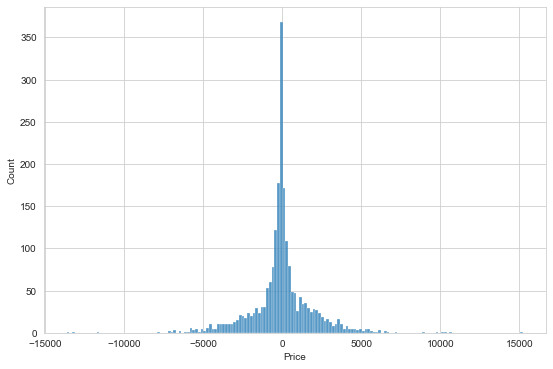

In [357]:
plt.figure(figsize = (9, 6))
sns.histplot(y_test - y_pred)

Text(0, 0.5, 'y_pred')

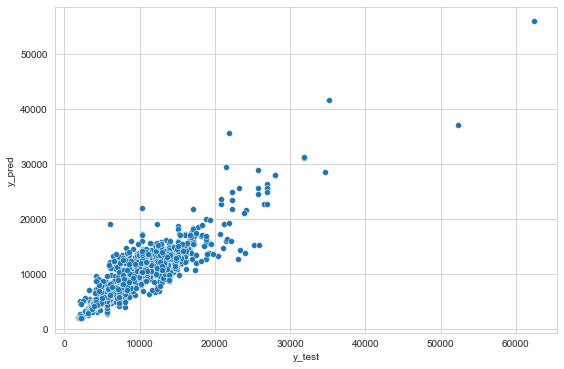

In [358]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")

In [324]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f"The Mean Average Error is: {mean_absolute_error(y_test, y_pred)}")
print(f"The Mean Squared Error is: {mean_squared_error(y_test, y_pred)}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, y_pred))}")

The Mean Average Error is: 1199.316104773249
The Mean Squared Error is: 3856453.2303166497
The Root Mean Squared Error is: 1963.7854338793354


## Hyperparameter Tuning using GridSearchCV

In [327]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [336]:
import sklearn
print(sklearn.__version__)

0.24.2


In [337]:
model_params = {
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10,100],
            'min_samples_leaf': [10,50,100]
        }
    },
    # 'SVR': {
    #     'model': SVR(),
    #     'params': {
    #         'n_neighbors': list(range(1,10)),
    #         'p': [1,2],
    #     }
    # },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['poisson','mae','mse'],
            'max_depth':[3,5,10]
        }
    },
    "XGBRegressor": {
        "model": XGBRegressor(use_label_encoder=False, booster='gbtree',
        eval_metric = "logloss"),
        "params": {'n_estimators': range(6, 10),
        'max_depth': range(3, 8),
        'learning_rate': [.01, .2, .3, .4, .5],
        'colsample_bytree': [.7, .8, .9, 1]}
    }     
}

In [332]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [340]:
scores = []

for model_name, mp in model_params.items():
    reg =  GridSearchCV(mp['model'], mp['params'], cv = 5, 
    scoring = "r2", return_train_score=False)
    reg.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': reg.best_score_,
        'best_params': reg.best_params_
    })
    
df_metrics = pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [341]:
df_metrics

,model,best_score,best_params
0,random_forest,0.772507,"{'min_samples_leaf': 10, 'n_estimators': 100}"
1,decision_tree,0.745228,"{'criterion': 'mse', 'max_depth': 10}"
2,XGBClassifier,0.804227,"{'colsample_bytree': 0.9, 'learning_rate': 0.5..."


### XGBRegressor

In [343]:
from xgboost import XGBRegressor
reg_xgb = XGBRegressor(colsample_bytree=0.9, learning_rate=0.5)
reg_xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [344]:
y_pred = reg_xgb.predict(x_test)

In [345]:
r2_score(y_test, y_pred)

0.8437079706048072

In [348]:
print(f"The Mean Average Error is: {mean_absolute_error(y_test, y_pred)}")
print(f"The Mean Squared Error is: {mean_squared_error(y_test, y_pred)}")
print(f"The Root Mean Squared Error is: {np.sqrt(mean_squared_error(y_test, y_pred))}")

The Mean Average Error is: 1224.3761812316295
The Mean Squared Error is: 3465127.884304108
The Root Mean Squared Error is: 1861.4853972846813


In [350]:
df_test["Price"].mean()

9146.190921853065

<AxesSubplot:xlabel='Price', ylabel='Count'>

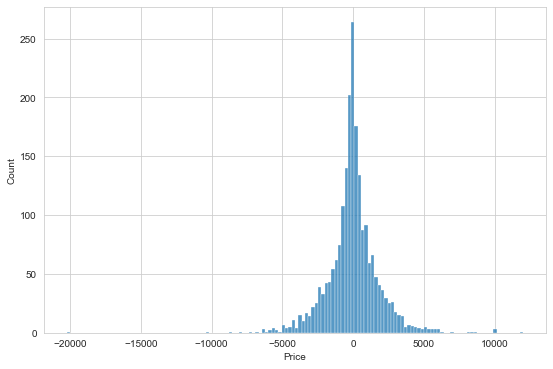

In [351]:
plt.figure(figsize = (9, 6))
sns.histplot(y_test - y_pred)

Text(0, 0.5, 'y_pred')

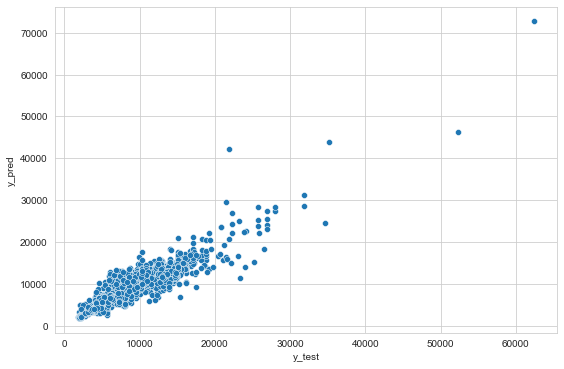

In [347]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = y_test, y = y_pred)
plt.xlabel("y_test")
plt.ylabel("y_pred")